In [1]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

import requests
import pandas as pd
import numpy as np
from syn_model import *
from filter_data import *
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN #For clustering
from matplotlib import pyplot as plt

## Clean the csv downloaded from the web

In [3]:
from load_and_clean import *

update_data('Israel')

time_series, time_series_pop = load_clean('Israel geographic')
df_byage, df_byage_pop = load_clean('Israel vaccinations')

df_byage_pop_flat = pd.DataFrame(df_byage_pop.to_records()).set_index("Date")

In [4]:
df_byage_pop

level_2           _id first_dose_0-19 first_dose_20-29 first_dose_30-39  \
CityCode         1375            1375             1375             1375   
Date                                                                      
2020-12-20  31.191300        0.000000         0.000000         0.000000   
2020-12-21  31.240732        0.000000         0.000000         0.000000   
2020-12-22  31.290163        0.000000         0.000000         0.000000   
2020-12-23  31.339595        0.000000         0.000000         0.000000   
2020-12-24  31.389026        0.000000         0.000000         0.000000   
...               ...             ...              ...              ...   
2021-03-30  36.134454        0.346021         2.125556         1.433515   
2021-03-31  36.183885        0.346021         2.174988         1.433515   
2021-04-01  36.233317        0.346021         2.174988         1.433515   
2021-04-02  36.282748        0.346021         2.174988         1.433515   
2021-04-03  36.332180        0.346021         2.174988         1.433515   

level_2    first_dose_40-49 first_dose_50-59 first_dose_60-69  \
CityCode               1375             1375             1375   
Date                                                            
2020-12-20         0.000000         0.000000         0.000000   
2020-12-21         0.000000         0.000000         0.000000   
2020-12-22         0.000000         0.000000         0.000000   
2020-12-23         0.000000         0.000000         0.000000   
2020-12-24         0.000000         0.000000         0.000000   
...                     ...              ...              ...   
2021-03-30         1.087494         0.889768         0.346021   
2021-03-31         1.087494         0.889768         0.346021   
2021-04-01         1.087494         0.889768         0.346021   
2021-04-02         1.136925         0.889768         0.346021   
2021-04-03         1.136925         0.889768         0.346021   

level_2    first_dose_70-79 first_dose_80-89 first_dose_90+  ...            \
CityCode               1375             1375           1375  ...      709    
Date                                                         ...             
2020-12-20         0.000000         0.000000            0.0  ...  0.000000   
2020-12-21         0.000000         0.000000            0.0  ...  0.000000   
2020-12-22         0.000000         0.000000            0.0  ...  0.000000   
2020-12-23         0.000000         0.000000            0.0  ...  0.000000   
2020-12-24         0.000000         0.000000            0.0  ...  0.321396   
...                     ...              ...            ...  ...       ...   
2021-03-30         0.346021         0.346021            0.0  ...  0.321396   
2021-03-31         0.346021         0.346021            0.0  ...  0.321396   
2021-04-01         0.346021         0.346021            0.0  ...  0.321396   
2021-04-02         0.346021         0.346021            0.0  ...  0.321396   
2021-04-03         0.346021         0.346021            0.0  ...  0.321396   

level_2    second_dose_0-19 second_dose_20-29 second_dose_30-39  \
CityCode               709               709               709    
Date                                                              
2020-12-20         0.000000          0.000000          0.000000   
2020-12-21         0.000000          0.000000          0.000000   
2020-12-22         0.000000          0.000000          0.000000   
2020-12-23         0.000000          0.000000          0.000000   
2020-12-24         0.000000          0.000000          0.000000   
...                     ...               ...               ...   
2021-03-30         2.846648          4.866850          3.810836   
2021-03-31         2.846648          4.866850          3.810836   
2021-04-01         2.892562          4.912764          3.856749   
2021-04-02         2.892562          4.912764          3.856749   
2021-04-03         2.892562          4.912764          3.856749   

level_

## Analysis

In [7]:
feature_dict, features = cluster_time_series(df_byage_pop_flat, cluster_method = 'kmeans', n_clusters = 6)
colors = get_colors(len(feature_dict), picker = 2)

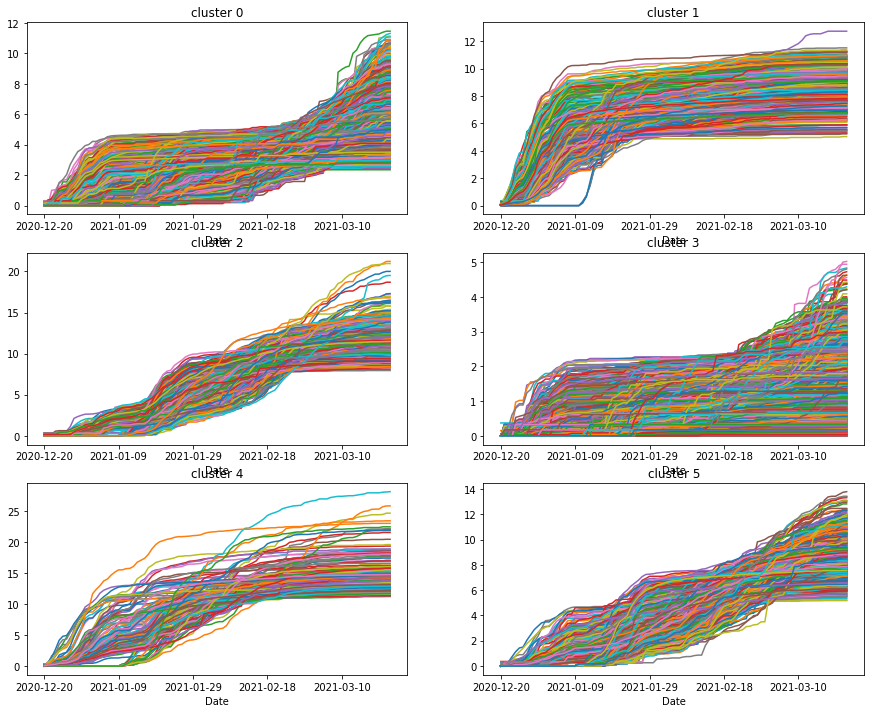

In [8]:
i = 321
for key in feature_dict:
    ax = plt.subplot(i)
    i += 1
    df_byage_pop_flat.loc[:][feature_dict[key]].plot(ax = ax, legend=False, figsize = (15, 12), title = "cluster %s" %(key))

In [9]:
model = syn_model(472, 3, [df_byage_pop['first_dose_0-19']], 60, 30)
model.fit_model()

/Users/codymorrin/covid/COVID19-synthetic-control-analysis/synthetic_control_analysis/syn_model.py:392: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=20)


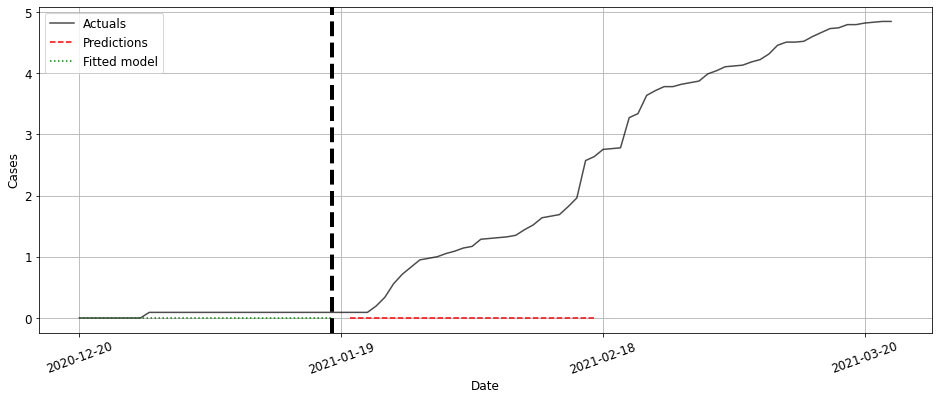

In [10]:
model.plot()